<a href="https://colab.research.google.com/github/ayushwattal/HelloWorld/blob/main/SetimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Downloading pysentiment2 library for Sentiment analysis.
# This Library is based on Loughran and McDonald Financial Sentiment Dictionaries (https://pypi.org/project/pysentiment2/)
# This Project uses two datasets 
# 1. NewsDataset - https://www.kaggle.com/rmisra/news-category-dataset
# 2. 



pip install pysentiment2 

     |████████████████████████████████| 1.9 MB 29.3 MB/s 


In [92]:
# Importing Libraries
import numpy as np
import pandas as pd
import pysentiment2 as ps
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score


In [24]:
# Reading Historical News Data 
NewsDataset = pd.read_json('./News_Category_Dataset_v2.json',lines=True)
NewsDataset

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


In [25]:
NewsDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [26]:
NewsDataset.authors.nunique()

27993

In [27]:
NewsDataset.loc[NewsDataset['authors'] == "Ron Dicker"]

,category,headline,authors,link,short_description,date
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,Ron Dicker,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ...",2018-05-26
6,ENTERTAINMENT,Donald Trump Is Lovin' New McDonald's Jingle I...,Ron Dicker,https://www.huffingtonpost.com/entry/donald-tr...,"It's catchy, all right.",2018-05-26
...,...,...,...,...,...,...
198268,BUSINESS,Oscars 2012: How Much Money Is At Stake,Ron Dicker,https://www.huffingtonpost.com/entry/oscars-20...,Sunday's Academy Awards are all about celebrat...,2012-02-25
198269,BUSINESS,Oscars 2012: Ads Grant Marketers An Advantage ...,Ron Dicker,https://www.huffingtonpost.com/entry/oscars-ad...,"Of course, Oscar spots won't reach nearly as m...",2012-02-25
198892,BUSINESS,Jeremy Lin Applies For Trademark On Linsanity,Ron Dicker,https://www.huffingtonpost.com/entry/jeremy-li...,"Now that Lin is defending his name, perhaps ev...",2012-02-18
199483,BUSINESS,"Jeremy Lin, Knicks Star, Shouldn't Be Too Quic...",Ron Dicker,https://www.huffingtonpost.com/entry/jeremy-li...,Branding wonks have thrown out many comparison...,2012-02-12


In [28]:
NewsDataset.isnull().values.any()

False

In [29]:
NewsDataset = NewsDataset.rename(columns={"date": "Date"})

In [30]:
NewsDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   Date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


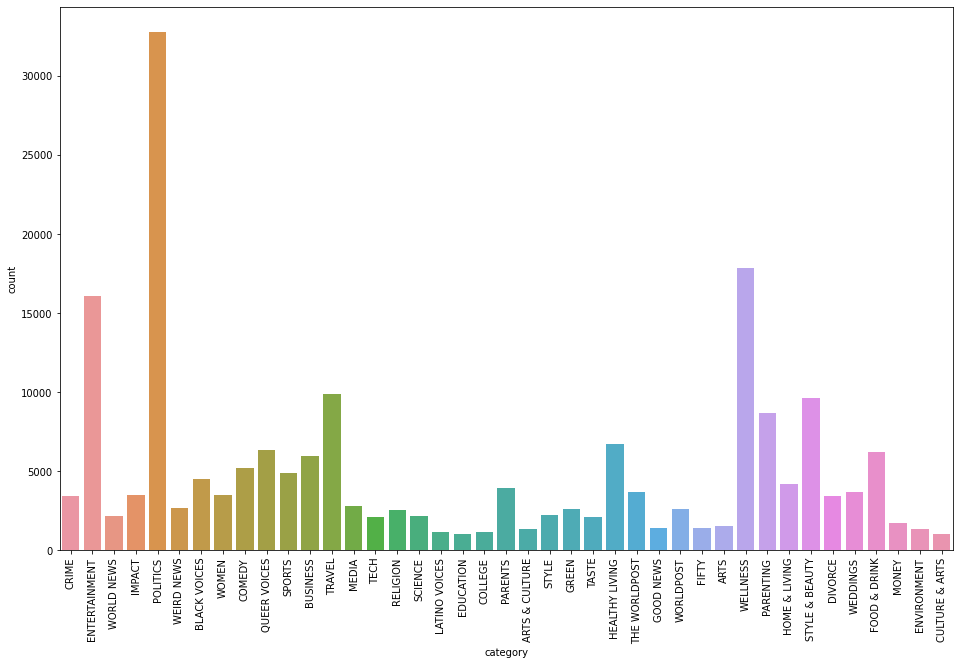

In [31]:
fig,ax = plt.subplots(figsize=(16,10))
chart = sns.countplot(x ='category',data=NewsDataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [32]:
NewsDataset = NewsDataset.drop(['authors','category'], axis = 1)

In [33]:
NewsDataset

,headline,link,short_description,Date
0,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...
200848,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,Maria Sharapova Stunned By Victoria Azarenka I...,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,"Giants Over Patriots, Jets Over Colts Among M...",https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,Aldon Smith Arrested: 49ers Linebacker Busted ...,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


In [34]:
# Merging Text columns togetgher
NewsDataset['Text'] = NewsDataset['headline'].str.cat(NewsDataset['short_description'], sep='  ')

In [35]:
NewsDataset

,headline,link,short_description,Date,Text
0,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...
1,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...
2,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Hugh Grant Marries For The First Time At Age 5...
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...,...,...,...
200848,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
200849,Maria Sharapova Stunned By Victoria Azarenka I...,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...
200850,"Giants Over Patriots, Jets Over Colts Among M...",https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28,"Giants Over Patriots, Jets Over Colts Among M..."
200851,Aldon Smith Arrested: 49ers Linebacker Busted ...,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...


In [36]:
NewsDataset['Text'].iloc[0]

'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV  She left her husband. He killed their children. Just another day in America.'

In [37]:
NewsDataset = NewsDataset.drop(['headline', 'short_description'], axis = 1)

In [38]:
NewsDataset

,link,Date,Text
0,https://www.huffingtonpost.com/entry/texas-ama...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...
1,https://www.huffingtonpost.com/entry/will-smit...,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...
2,https://www.huffingtonpost.com/entry/hugh-gran...,2018-05-26,Hugh Grant Marries For The First Time At Age 5...
3,https://www.huffingtonpost.com/entry/jim-carre...,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,https://www.huffingtonpost.com/entry/julianna-...,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...,...
200848,https://www.huffingtonpost.com/entry/rim-ceo-t...,2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
200849,https://www.huffingtonpost.com/entry/maria-sha...,2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...
200850,https://www.huffingtonpost.com/entry/super-bow...,2012-01-28,"Giants Over Patriots, Jets Over Colts Among M..."
200851,https://www.huffingtonpost.com/entry/aldon-smi...,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...


In [39]:
NewsDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   link    200853 non-null  object        
 1   Date    200853 non-null  datetime64[ns]
 2   Text    200853 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 4.6+ MB


In [40]:
# Removing special characters , only keeping alphabet 
NewsDataset['Text'].replace("[^a-zA-Z]"," ",regex = True,inplace = True)

In [41]:
NewsDataset

,link,Date,Text
0,https://www.huffingtonpost.com/entry/texas-ama...,2018-05-26,There Were Mass Shootings In Texas Last Week...
1,https://www.huffingtonpost.com/entry/will-smit...,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The ...
2,https://www.huffingtonpost.com/entry/hugh-gran...,2018-05-26,Hugh Grant Marries For The First Time At Age ...
3,https://www.huffingtonpost.com/entry/jim-carre...,2018-05-26,Jim Carrey Blasts Castrato Adam Schiff And D...
4,https://www.huffingtonpost.com/entry/julianna-...,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...,...
200848,https://www.huffingtonpost.com/entry/rim-ceo-t...,2012-01-28,RIM CEO Thorsten Heins Significant Plans Fo...
200849,https://www.huffingtonpost.com/entry/maria-sha...,2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...
200850,https://www.huffingtonpost.com/entry/super-bow...,2012-01-28,Giants Over Patriots Jets Over Colts Among M...
200851,https://www.huffingtonpost.com/entry/aldon-smi...,2012-01-28,Aldon Smith Arrested ers Linebacker Busted ...


In [42]:
# Converting all text to lower case, so upper case words and lower case words are not considered different.
NewsDataset['Text'] = NewsDataset['Text'].str.lower()

In [43]:
NewsDataset

,link,Date,Text
0,https://www.huffingtonpost.com/entry/texas-ama...,2018-05-26,there were mass shootings in texas last week...
1,https://www.huffingtonpost.com/entry/will-smit...,2018-05-26,will smith joins diplo and nicky jam for the ...
2,https://www.huffingtonpost.com/entry/hugh-gran...,2018-05-26,hugh grant marries for the first time at age ...
3,https://www.huffingtonpost.com/entry/jim-carre...,2018-05-26,jim carrey blasts castrato adam schiff and d...
4,https://www.huffingtonpost.com/entry/julianna-...,2018-05-26,julianna margulies uses donald trump poop bags...
...,...,...,...
200848,https://www.huffingtonpost.com/entry/rim-ceo-t...,2012-01-28,rim ceo thorsten heins significant plans fo...
200849,https://www.huffingtonpost.com/entry/maria-sha...,2012-01-28,maria sharapova stunned by victoria azarenka i...
200850,https://www.huffingtonpost.com/entry/super-bow...,2012-01-28,giants over patriots jets over colts among m...
200851,https://www.huffingtonpost.com/entry/aldon-smi...,2012-01-28,aldon smith arrested ers linebacker busted ...


In [44]:
# Using pysentiment2 library tokenize words, this api converts words to tokens using stemming and removing Stop words 
lm = ps.LM()
NewsDataset['Tokens'] = NewsDataset.apply(lambda row: lm.tokenize(row['Text']), axis=1)

In [45]:
NewsDataset

,link,Date,Text,Tokens
0,https://www.huffingtonpost.com/entry/texas-ama...,2018-05-26,there were mass shootings in texas last week...,"[mass, shoot, on, tv, left, husband, kill, chi..."
1,https://www.huffingtonpost.com/entry/will-smit...,2018-05-26,will smith joins diplo and nicky jam for the ...,"[join, diplo, jam, world, cup, s, offici, cours]"
2,https://www.huffingtonpost.com/entry/hugh-gran...,2018-05-26,hugh grant marries for the first time at age ...,"[time, actor, longtim, girlfriend, eberstein, ..."
3,https://www.huffingtonpost.com/entry/jim-carre...,2018-05-26,jim carrey blasts castrato adam schiff and d...,"[carrey, blast, castrato, schiff, democrat, ar..."
4,https://www.huffingtonpost.com/entry/julianna-...,2018-05-26,julianna margulies uses donald trump poop bags...,"[marguli, use, trump, poop, bag, pick, dog, di..."
...,...,...,...,...
200848,https://www.huffingtonpost.com/entry/rim-ceo-t...,2012-01-28,rim ceo thorsten heins significant plans fo...,"[rim, ceo, thorsten, signific, plan, blackberr..."
200849,https://www.huffingtonpost.com/entry/maria-sha...,2012-01-28,maria sharapova stunned by victoria azarenka i...,"[sharapova, stun, azarenka, australian, open, ..."
200850,https://www.huffingtonpost.com/entry/super-bow...,2012-01-28,giants over patriots jets over colts among m...,"[giant, patriot, jet, colt, improb, super, ups..."
200851,https://www.huffingtonpost.com/entry/aldon-smi...,2012-01-28,aldon smith arrested ers linebacker busted ...,"[aldon, arrest, er, lineback, bust, dui, corre..."


In [46]:
# Calculating Sentiments of tokens
NewsDataset['Score'] = NewsDataset.apply(lambda row: lm.get_score(row['Tokens']), axis=1)
NewsDataset

,link,Date,Text,Tokens,Score
0,https://www.huffingtonpost.com/entry/texas-ama...,2018-05-26,there were mass shootings in texas last week...,"[mass, shoot, on, tv, left, husband, kill, chi...","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0..."
1,https://www.huffingtonpost.com/entry/will-smit...,2018-05-26,will smith joins diplo and nicky jam for the ...,"[join, diplo, jam, world, cup, s, offici, cours]","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0..."
2,https://www.huffingtonpost.com/entry/hugh-gran...,2018-05-26,hugh grant marries for the first time at age ...,"[time, actor, longtim, girlfriend, eberstein, ...","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0..."
3,https://www.huffingtonpost.com/entry/jim-carre...,2018-05-26,jim carrey blasts castrato adam schiff and d...,"[carrey, blast, castrato, schiff, democrat, ar...","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0..."
4,https://www.huffingtonpost.com/entry/julianna-...,2018-05-26,julianna margulies uses donald trump poop bags...,"[marguli, use, trump, poop, bag, pick, dog, di...","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0..."
...,...,...,...,...,...
200848,https://www.huffingtonpost.com/entry/rim-ceo-t...,2012-01-28,rim ceo thorsten heins significant plans fo...,"[rim, ceo, thorsten, signific, plan, blackberr...","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0..."
200849,https://www.huffingtonpost.com/entry/maria-sha...,2012-01-28,maria sharapova stunned by victoria azarenka i...,"[sharapova, stun, azarenka, australian, open, ...","{'Positive': 0, 'Negative': 1, 'Polarity': -0...."
200850,https://www.huffingtonpost.com/entry/super-bow...,2012-01-28,giants over patriots jets over colts among m...,"[giant, patriot, jet, colt, improb, super, ups...","{'Positive': 1, 'Negative': 1, 'Polarity': 0.0..."
200851,https://www.huffingtonpost.com/entry/aldon-smi...,2012-01-28,aldon smith arrested ers linebacker busted ...,"[aldon, arrest, er, lineback, bust, dui, corre...","{'Positive': 0, 'Negative': 4, 'Polarity': -0...."


In [47]:
pd.set_option('display.max_colwidth', None)

In [48]:
NewsDataset.iloc[200850]

link                                                                                                                                          https://www.huffingtonpost.com/entry/super-bowl-upsets-the-mos_us_5bb69b1de4b097869fd1b26d
Date                                                                                                                                                                                                                 2012-01-28 00:00:00
Text      giants over patriots  jets over colts among  most improbable super bowl upsets of all time  videos   leading up to super bowl xlvi  the most talked about game could end up being one that occurred a few years ago  after all
Tokens                                                                                                                    [giant, patriot, jet, colt, improb, super, upset, time, video, lead, super, xlvi, talk, game, end, occur, ago]
Score                                                               

In [49]:
display(NewsDataset.loc[200850:200851])

,link,Date,Text,Tokens,Score
200850,https://www.huffingtonpost.com/entry/super-bowl-upsets-the-mos_us_5bb69b1de4b097869fd1b26d,2012-01-28,giants over patriots jets over colts among most improbable super bowl upsets of all time videos leading up to super bowl xlvi the most talked about game could end up being one that occurred a few years ago after all,"[giant, patriot, jet, colt, improb, super, upset, time, video, lead, super, xlvi, talk, game, end, occur, ago]","{'Positive': 1, 'Negative': 1, 'Polarity': 0.0, 'Subjectivity': 0.11764705190311459}"
200851,https://www.huffingtonpost.com/entry/aldon-smith-arrested-dui-49ers_us_5bb69b25e4b097869fd1b33c,2012-01-28,aldon smith arrested ers linebacker busted for dui correction an earlier version of this story incorrectly stated the location of ktvu and the league leader in sacks,"[aldon, arrest, er, lineback, bust, dui, correct, earlier, version, incorrectli, locat, ktvu, leagu, leader, sack]","{'Positive': 0, 'Negative': 4, 'Polarity': -0.9999997500000625, 'Subjectivity': 0.2666666488888901}"


In [50]:
df = NewsDataset['Score'].apply(pd.Series,copy = True)

In [51]:
df

,Positive,Negative,Polarity,Subjectivity
0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.000000,0.000000
...,...,...,...,...
200848,0.0,0.0,0.000000,0.000000
200849,0.0,1.0,-0.999999,0.071429
200850,1.0,1.0,0.000000,0.117647
200851,0.0,4.0,-1.000000,0.266667


In [52]:
NewsCategoryDataset = pd.concat([NewsDataset, df], axis=1)

In [53]:
NewsCategoryDataset = NewsCategoryDataset.drop(['Score'], axis = 1)

In [54]:
pd.reset_option('^display.', silent=True)

In [55]:
NewsCategoryDataset

,link,Date,Text,Tokens,Positive,Negative,Polarity,Subjectivity
0,https://www.huffingtonpost.com/entry/texas-ama...,2018-05-26,there were mass shootings in texas last week...,"[mass, shoot, on, tv, left, husband, kill, chi...",0.0,0.0,0.000000,0.000000
1,https://www.huffingtonpost.com/entry/will-smit...,2018-05-26,will smith joins diplo and nicky jam for the ...,"[join, diplo, jam, world, cup, s, offici, cours]",0.0,0.0,0.000000,0.000000
2,https://www.huffingtonpost.com/entry/hugh-gran...,2018-05-26,hugh grant marries for the first time at age ...,"[time, actor, longtim, girlfriend, eberstein, ...",0.0,0.0,0.000000,0.000000
3,https://www.huffingtonpost.com/entry/jim-carre...,2018-05-26,jim carrey blasts castrato adam schiff and d...,"[carrey, blast, castrato, schiff, democrat, ar...",0.0,0.0,0.000000,0.000000
4,https://www.huffingtonpost.com/entry/julianna-...,2018-05-26,julianna margulies uses donald trump poop bags...,"[marguli, use, trump, poop, bag, pick, dog, di...",0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
200848,https://www.huffingtonpost.com/entry/rim-ceo-t...,2012-01-28,rim ceo thorsten heins significant plans fo...,"[rim, ceo, thorsten, signific, plan, blackberr...",0.0,0.0,0.000000,0.000000
200849,https://www.huffingtonpost.com/entry/maria-sha...,2012-01-28,maria sharapova stunned by victoria azarenka i...,"[sharapova, stun, azarenka, australian, open, ...",0.0,1.0,-0.999999,0.071429
200850,https://www.huffingtonpost.com/entry/super-bow...,2012-01-28,giants over patriots jets over colts among m...,"[giant, patriot, jet, colt, improb, super, ups...",1.0,1.0,0.000000,0.117647
200851,https://www.huffingtonpost.com/entry/aldon-smi...,2012-01-28,aldon smith arrested ers linebacker busted ...,"[aldon, arrest, er, lineback, bust, dui, corre...",0.0,4.0,-1.000000,0.266667


In [56]:
# Reading Historical Apple Stock Data
AppleStockDataset = pd.read_csv('./AAPL.csv')
AppleStockDataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400
...,...,...,...,...,...,...,...
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500


# Data Pre Processing

In [57]:
AppleStockDataset = AppleStockDataset.rename(columns={"Adj Close": "AdjClose"})

In [58]:
AppleStockDataset['Date'] = pd.to_datetime(AppleStockDataset['Date'], format='%Y-%m-%d')

In [59]:
AppleStockDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      9909 non-null   datetime64[ns]
 1   Open      9909 non-null   float64       
 2   High      9909 non-null   float64       
 3   Low       9909 non-null   float64       
 4   Close     9909 non-null   float64       
 5   AdjClose  9909 non-null   float64       
 6   Volume    9909 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 542.0 KB


# Data Exploration

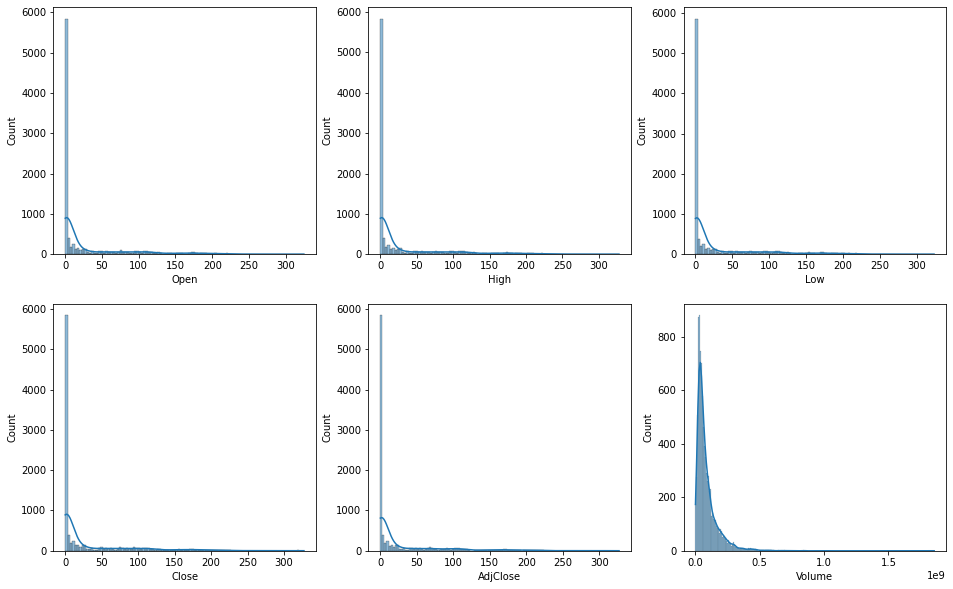

In [60]:
fig,ax = plt.subplots(2,3,figsize=(16,10))
sns.histplot(x ='Open',data=AppleStockDataset, ax=ax[0][0],kde=True)
sns.histplot(x ='High',data=AppleStockDataset, ax=ax[0][1],kde=True)
sns.histplot(x ='Low',data=AppleStockDataset, ax=ax[0][2],kde=True)
sns.histplot(x ='Close',data=AppleStockDataset, ax=ax[1][0],kde=True)
sns.histplot(x ='Volume',data=AppleStockDataset, ax=ax[1][2],kde=True)
sns.histplot(x ='AdjClose',data=AppleStockDataset, ax=ax[1][1],kde=True)
plt.show()

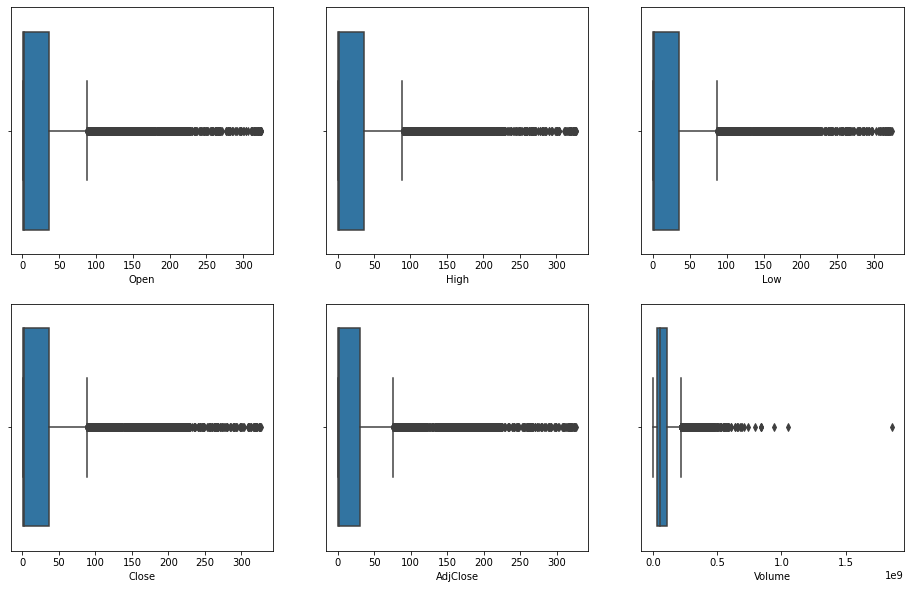

In [61]:
fig,ax = plt.subplots(2,3,figsize=(16,10))
sns.boxplot(x ='Open',data=AppleStockDataset, ax=ax[0][0])
sns.boxplot(x ='High',data=AppleStockDataset, ax=ax[0][1])
sns.boxplot(x ='Low',data=AppleStockDataset, ax=ax[0][2])
sns.boxplot(x ='Close',data=AppleStockDataset, ax=ax[1][0])
sns.boxplot(x ='Volume',data=AppleStockDataset, ax=ax[1][2])
sns.boxplot(x ='AdjClose',data=AppleStockDataset, ax=ax[1][1])
plt.show()


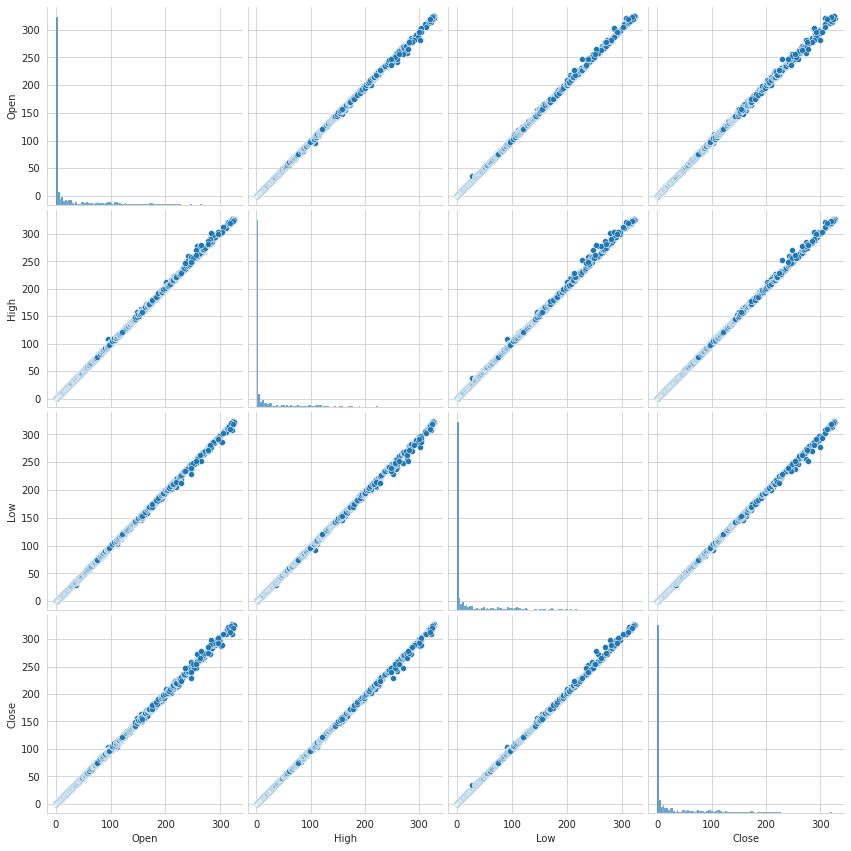

In [62]:
# sns.set(font_scale=1.1)
sns.set_style('whitegrid')

grid = sns.pairplot(data=AppleStockDataset, vars=AppleStockDataset.columns[1:5], height=3) 

In [63]:
corr = AppleStockDataset.corr(method='pearson')
corr

,Open,High,Low,Close,AdjClose,Volume
Open,1.000000,0.999935,0.999931,0.999878,0.998933,-0.133347
High,0.999935,1.000000,0.999887,0.999929,0.999041,-0.132296
Low,0.999931,0.999887,1.000000,0.999931,0.998992,-0.135045
Close,0.999878,0.999929,0.999931,1.000000,0.999098,-0.133697
AdjClose,0.998933,0.999041,0.998992,0.999098,1.000000,-0.142612
Volume,-0.133347,-0.132296,-0.135045,-0.133697,-0.142612,1.000000


# Data Engineering

In [64]:
# Filtering Stock Data based on dates as News Data is not present .
AppleStockDataset = AppleStockDataset.loc[(AppleStockDataset['Date'] >= '2012-01-01')
                     & (AppleStockDataset['Date'] < '2018-06-10')]

In [65]:
AppleStockDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1619 entries, 7834 to 9452
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1619 non-null   datetime64[ns]
 1   Open      1619 non-null   float64       
 2   High      1619 non-null   float64       
 3   Low       1619 non-null   float64       
 4   Close     1619 non-null   float64       
 5   AdjClose  1619 non-null   float64       
 6   Volume    1619 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 101.2 KB


In [66]:
# Creating Label for Stock Data based on Stock Closing and Opening Flight
 AppleStockDataset['Label'] = np.where((AppleStockDataset['Close'] - AppleStockDataset['Open']) > 0, 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
AppleStockDataset

,Date,Open,High,Low,Close,AdjClose,Volume,Label
7834,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.994907,75555200,1
7835,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.268970,65005500,1
7836,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.838169,67817400,1
7837,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.380054,79573200,1
7838,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.296970,98506100,0
...,...,...,...,...,...,...,...,...
9448,2018-06-04,191.639999,193.419998,191.350006,191.830002,187.230743,26266200,1
9449,2018-06-05,193.070007,193.940002,192.360001,193.309998,188.675247,21566000,1
9450,2018-06-06,193.630005,194.080002,191.919998,193.979996,189.329178,20933600,1
9451,2018-06-07,194.139999,194.199997,192.339996,193.460007,188.821671,21347200,0


In [68]:
AppleStockDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1619 entries, 7834 to 9452
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1619 non-null   datetime64[ns]
 1   Open      1619 non-null   float64       
 2   High      1619 non-null   float64       
 3   Low       1619 non-null   float64       
 4   Close     1619 non-null   float64       
 5   AdjClose  1619 non-null   float64       
 6   Volume    1619 non-null   int64         
 7   Label     1619 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 113.8 KB


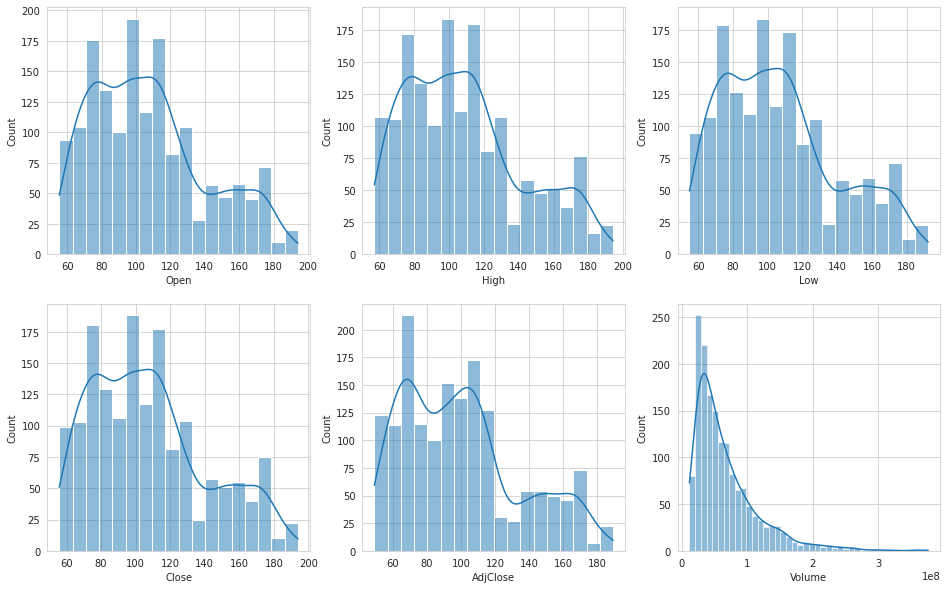

In [69]:
fig,ax = plt.subplots(2,3,figsize=(16,10))
sns.histplot(x ='Open',data=AppleStockDataset, ax=ax[0][0],kde=True)
sns.histplot(x ='High',data=AppleStockDataset, ax=ax[0][1],kde=True)
sns.histplot(x ='Low',data=AppleStockDataset, ax=ax[0][2],kde=True)
sns.histplot(x ='Close',data=AppleStockDataset, ax=ax[1][0],kde=True)
sns.histplot(x ='Volume',data=AppleStockDataset, ax=ax[1][2],kde=True)
sns.histplot(x ='AdjClose',data=AppleStockDataset, ax=ax[1][1],kde=True)
plt.show()

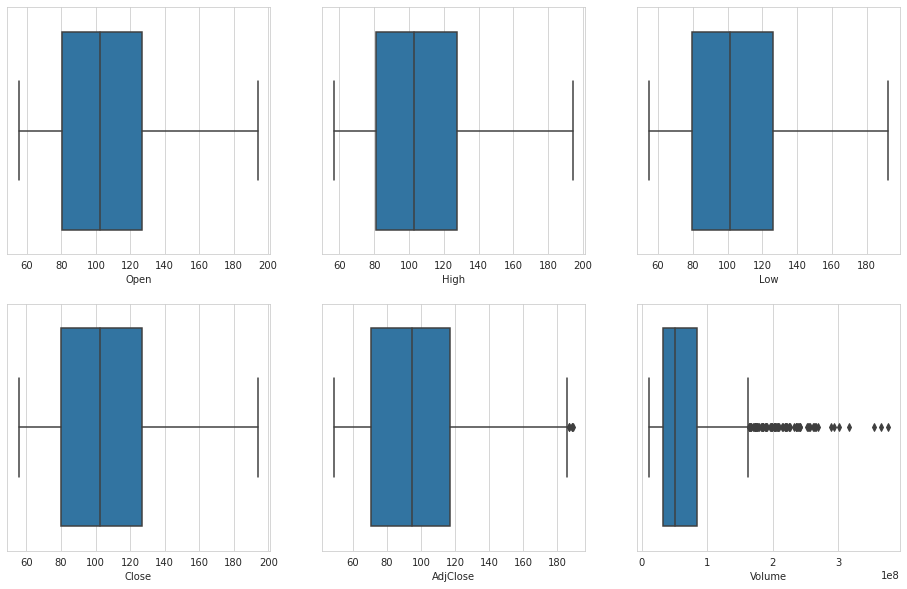

In [70]:
fig,ax = plt.subplots(2,3,figsize=(16,10))
sns.boxplot(x ='Open',data=AppleStockDataset, ax=ax[0][0])
sns.boxplot(x ='High',data=AppleStockDataset, ax=ax[0][1])
sns.boxplot(x ='Low',data=AppleStockDataset, ax=ax[0][2])
sns.boxplot(x ='Close',data=AppleStockDataset, ax=ax[1][0])
sns.boxplot(x ='Volume',data=AppleStockDataset, ax=ax[1][2])
sns.boxplot(x ='AdjClose',data=AppleStockDataset, ax=ax[1][1])
plt.show()


# Data Preperation

In [71]:
# Combining both datasets based on date
combined_dataset = NewsCategoryDataset.merge(AppleStockDataset,how='inner',on='Date',left_index=True)

In [72]:
combined_dataset

,link,Date,Text,Tokens,Positive,Negative,Polarity,Subjectivity,Open,High,Low,Close,AdjClose,Volume,Label
9443,https://www.huffingtonpost.com/entry/north-kor...,2018-05-25,north korea still open to talks after trump ca...,"[open, talk, trump, cancel, summit, trump, s, ...",0.0,3.0,-1.0,0.157895,188.229996,189.649994,187.649994,188.580002,184.058655,17461000,1
9443,https://www.huffingtonpost.com/entry/mississau...,2018-05-25,men detonate bomb inside indian restaurant n...,"[men, deton, bomb, insid, restaur, near, autho...",0.0,2.0,-1.0,0.166667,188.229996,189.649994,187.649994,188.580002,184.058655,17461000,1
9443,https://www.huffingtonpost.com/entry/irish-tra...,2018-05-25,thousands travel home to ireland to vote on ab...,"[travel, home, vote, on, abort, access, tri, h...",0.0,0.0,0.0,0.000000,188.229996,189.649994,187.649994,188.580002,184.058655,17461000,1
9443,https://www.huffingtonpost.com/entry/ireland-a...,2018-05-25,irish voters set to liberalize abortion laws i...,"[voter, set, liber, abort, landslid, exit, pol...",0.0,0.0,0.0,0.000000,188.229996,189.649994,187.649994,188.580002,184.058655,17461000,1
9443,https://www.huffingtonpost.com/entry/warriors-...,2018-05-25,warriors coach steve kerr calls nfl ban on pro...,"[warrior, coach, nfl, ban, on, protest, fake, ...",0.0,3.0,-1.0,0.200000,188.229996,189.649994,187.649994,188.580002,184.058655,17461000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7852,https://www.huffingtonpost.com/entry/grieving-...,2012-01-30,aggrieved over grief as a diagnosis in dsm my...,"[aggriev, grief, diagnosi, dsm, concern, add, ...",0.0,4.0,-1.0,0.200000,63.672855,64.842857,63.627144,64.715714,56.175880,94835300,1
7852,https://www.huffingtonpost.com/entry/jump-rope...,2012-01-30,we tried it jump rope workout growing up i ...,"[tri, jump, rope, workout, like, use, jump, ro...",0.0,0.0,0.0,0.000000,63.672855,64.842857,63.627144,64.715714,56.175880,94835300,1
7852,https://www.huffingtonpost.com/entry/minding-y...,2012-01-30,minding your own life the bottom line is that...,"[mind, life, line, matter, belief, base, on, i...",0.0,0.0,0.0,0.000000,63.672855,64.842857,63.627144,64.715714,56.175880,94835300,1
7852,https://www.huffingtonpost.com/entry/berenice-...,2012-01-30,berenice bejo s two beauty looks which do you...,"[bejo, s, beauti, look, like, poll, beauti, re...",2.0,0.0,1.0,0.117647,63.672855,64.842857,63.627144,64.715714,56.175880,94835300,1


In [73]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148222 entries, 9443 to 7852
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   link          148222 non-null  object        
 1   Date          148222 non-null  datetime64[ns]
 2   Text          148222 non-null  object        
 3   Tokens        148222 non-null  object        
 4   Positive      148222 non-null  float64       
 5   Negative      148222 non-null  float64       
 6   Polarity      148222 non-null  float64       
 7   Subjectivity  148222 non-null  float64       
 8   Open          148222 non-null  float64       
 9   High          148222 non-null  float64       
 10  Low           148222 non-null  float64       
 11  Close         148222 non-null  float64       
 12  AdjClose      148222 non-null  float64       
 13  Volume        148222 non-null  int64         
 14  Label         148222 non-null  int64         
dtypes: datetime64[ns

In [74]:
keep_columns = ['Open',	'High'	,'Low',	'Close','Volume',	'Label' ,'Polarity',	'Subjectivity']
dataset = combined_dataset[keep_columns]

In [75]:
dataset

,Open,High,Low,Close,Volume,Label,Polarity,Subjectivity
9443,188.229996,189.649994,187.649994,188.580002,17461000,1,-1.0,0.157895
9443,188.229996,189.649994,187.649994,188.580002,17461000,1,-1.0,0.166667
9443,188.229996,189.649994,187.649994,188.580002,17461000,1,0.0,0.000000
9443,188.229996,189.649994,187.649994,188.580002,17461000,1,0.0,0.000000
9443,188.229996,189.649994,187.649994,188.580002,17461000,1,-1.0,0.200000
...,...,...,...,...,...,...,...,...
7852,63.672855,64.842857,63.627144,64.715714,94835300,1,-1.0,0.200000
7852,63.672855,64.842857,63.627144,64.715714,94835300,1,0.0,0.000000
7852,63.672855,64.842857,63.627144,64.715714,94835300,1,0.0,0.000000
7852,63.672855,64.842857,63.627144,64.715714,94835300,1,1.0,0.117647


In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148222 entries, 9443 to 7852
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Open          148222 non-null  float64
 1   High          148222 non-null  float64
 2   Low           148222 non-null  float64
 3   Close         148222 non-null  float64
 4   Volume        148222 non-null  int64  
 5   Label         148222 non-null  int64  
 6   Polarity      148222 non-null  float64
 7   Subjectivity  148222 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 10.2 MB


In [77]:
corr = dataset.corr(method='pearson')
corr

,Open,High,Low,Close,Volume,Label,Polarity,Subjectivity
Open,1.000000,0.999619,0.999547,0.999148,-0.571631,-0.010760,-0.139334,0.055323
High,0.999619,1.000000,0.999439,0.999606,-0.567433,0.003728,-0.139255,0.055190
Low,0.999547,0.999439,1.000000,0.999622,-0.579865,0.005522,-0.139323,0.055170
Close,0.999148,0.999606,0.999622,1.000000,-0.574414,0.019006,-0.139272,0.055075
Volume,-0.571631,-0.567433,-0.579865,-0.574414,1.000000,-0.049323,0.103346,-0.042971
Label,-0.010760,0.003728,0.005522,0.019006,-0.049323,1.000000,-0.006776,-0.000510
Polarity,-0.139334,-0.139255,-0.139323,-0.139272,0.103346,-0.006776,1.000000,-0.216122
Subjectivity,0.055323,0.055190,0.055170,0.055075,-0.042971,-0.000510,-0.216122,1.000000


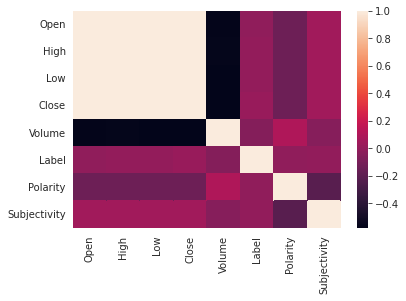

In [78]:
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels=corr.columns.values)

In [79]:
X = dataset[['Open',	'High'	,'Low',	'Close','Volume','Polarity',	'Subjectivity']]
X

,Open,High,Low,Close,Volume,Polarity,Subjectivity
9443,188.229996,189.649994,187.649994,188.580002,17461000,-1.0,0.157895
9443,188.229996,189.649994,187.649994,188.580002,17461000,-1.0,0.166667
9443,188.229996,189.649994,187.649994,188.580002,17461000,0.0,0.000000
9443,188.229996,189.649994,187.649994,188.580002,17461000,0.0,0.000000
9443,188.229996,189.649994,187.649994,188.580002,17461000,-1.0,0.200000
...,...,...,...,...,...,...,...
7852,63.672855,64.842857,63.627144,64.715714,94835300,-1.0,0.200000
7852,63.672855,64.842857,63.627144,64.715714,94835300,0.0,0.000000
7852,63.672855,64.842857,63.627144,64.715714,94835300,0.0,0.000000
7852,63.672855,64.842857,63.627144,64.715714,94835300,1.0,0.117647


In [80]:
y = dataset['Label']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 15)

# Data Modeling

In [85]:
# Training , Testing and Predcitng values using Naive Bayes Classifier

naivebayes_cf = GaussianNB()
naivebayes_cf.fit(X_train, y_train)
y_pred = naivebayes_cf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.18      0.26     21583
           1       0.52      0.85      0.65     22884

    accuracy                           0.52     44467
   macro avg       0.52      0.51      0.45     44467
weighted avg       0.52      0.52      0.46     44467



In [86]:
# Training , Testing and Predcitng values using Gradient Boosting Classifier

gradientBoosting_cf = GradientBoostingClassifier()
gradientBoosting_cf.fit(X_train, y_train)
y_pred = gradientBoosting_cf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     21583
           1       0.88      0.93      0.90     22884

    accuracy                           0.90     44467
   macro avg       0.90      0.90      0.90     44467
weighted avg       0.90      0.90      0.90     44467



In [91]:
# Training , Testing and Predcitng values using SVM Classifier

svm_cf = SVC(gamma='auto')
svm_cf.fit(X_train, y_train)
y_pred = svm_cf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21583
           1       1.00      1.00      1.00     22884

    accuracy                           1.00     44467
   macro avg       1.00      1.00      1.00     44467
weighted avg       1.00      1.00      1.00     44467



## Data Validation Using 5-Fold Validation

In [95]:
accuracy_score_nb = cross_val_score(naivebayes_cf, X, y, scoring='accuracy', cv = 5)
f1_score_nb = cross_val_score(naivebayes_cf, X, y, scoring ='f1', cv = 5)

print(f'Validated Accuracy Score Naive Bayes Model: {accuracy_score_nb.mean()}')
print(f'Validated F1 Score Bayes Naive Model: {f1_score_nb.mean()}')

Validated Accuracy Score Naive Bayes Model: 0.5145524695948337
Validated F1 Score Bayes Naive Model: 0.5642769209458129


In [96]:
accuracy_score_gradientBoosting = cross_val_score(gradientBoosting_cf, X, y, scoring='accuracy', cv = 5)
f1_score_gradientBoosting = cross_val_score(gradientBoosting_cf, X, y, scoring ='f1', cv = 5)

print(f'Validated Accuracy Score for Gradient Boost Model: {accuracy_score_gradientBoosting.mean()}')
print(f'Validated F1 Score for Gradient Boost Model: {f1_score_gradientBoosting.mean()}')

Validated Accuracy Score for Gradient Boost Model: 0.5834830664641564
Validated F1 Score for Gradient Boost Model: 0.5120006331803625


In [97]:
accuracy_score_svm = cross_val_score(svm_cf, X, y, scoring='accuracy', cv = 5)
f1_score_svm = cross_val_score(svm_cf, X, y, scoring ='f1', cv = 5)

print(f'Validated Accuracy Score for SVM Model: {accuracy_score_svm.mean()}')
print(f'Validated F1 Score for SVM Model: {f1_score_svm.mean()}')

Validated Accuracy Score for SVM Model: 0.515841112818421
Validated F1 Score for SVM Model: 0.6795426230222251


## Result

Based on above models after validation we can see that Accuracy of Gradient Boosting Model is best but F1 Score of SVM is better . As F1 is a better metric we can say the SVM Model is the best Model among these model.

We can also Tune Model and use other ensemble model for better accuracy and F1 Score for future scope.